In [1]:
# Installing all the required libraries
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [2]:
# Importing all the required libraries and modules.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
# Loading the csv file by hosting online in my github account due to file size upoload limit in moodle.
df = pd.read_csv('https://raw.githubusercontent.com/Sunilrai486/Datasets/main/BitcoinHeistData.csv')

In [4]:
# Checking the shape of the dataframe
df.shape

(1048575, 10)

In [5]:
# Checking the first five rows of the bitcoin heist data.
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2011,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2011,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2011,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2011,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2011,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [6]:
# Checking the last five rows of the bitcoin heist data.
df.tail()

,address,year,day,length,weight,count,looped,neighbors,income,label
1048570,1LfcACYNGFQcmUKubH6G4M4BfqBTxxkgzs,2017,287,144,7.010000e-05,496,0,2,5.500000e+07,white
1048571,1KjB3Lg7SUPwrjbcLp6eSMgikJCqiA5sBM,2017,287,100,2.840000e-14,1,0,2,1.804997e+10,white
1048572,1BLFGmeZE8tFNJBAwsk6pRkgSHrM2RoA8E,2018,287,4,2.500000e-01,1,0,2,1.563393e+08,white
1048573,1JZ1SGn2DNtxUqUXYC8ENLheiEvC5QxBCP,2018,287,2,2.000000e-01,1,0,2,5.553651e+09,white
1048574,1B2nKRCcpk8BuZo3M8Ju3FU4Kv8vg6pRub,2018,287,26,5.000000e-01,1,0,1,5.855557e+07,white


In [7]:
# Checking the descriptive statistics of the biction heist data.
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.012048e+03,1.735295e+02,2.631742e+01,5.406222e-01,1.582070e+02,3.608665e+01,2.324220e+00,9.026359e+09
std,1.005057e+00,1.001409e+02,4.272004e+01,2.990846e+00,6.024127e+02,2.884734e+02,1.862359e+01,2.555870e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.610000e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.011000e+03,8.800000e+01,0.000000e+00,1.897321e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.086922e+08
50%,2.012000e+03,1.710000e+02,6.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,5.000000e+08
75%,2.013000e+03,2.560000e+02,2.800000e+01,5.606003e-01,8.000000e+00,0.000000e+00,2.000000e+00,2.519020e+09
max,2.018000e+03,3.650000e+02,1.440000e+02,4.982885e+02,1.346200e+04,1.169300e+04,3.776000e+03,4.996440e+13


In [8]:
# Checking the detailed information of the bitcoin heist dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    1048575 non-null  object 
 1   year       1048575 non-null  int64  
 2   day        1048575 non-null  int64  
 3   length     1048575 non-null  int64  
 4   weight     1048575 non-null  float64
 5   count      1048575 non-null  int64  
 6   looped     1048575 non-null  int64  
 7   neighbors  1048575 non-null  int64  
 8   income     1048575 non-null  float64
 9   label      1048575 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 80.0+ MB


In [9]:
# Checking for the number of unique values in each column
df.nunique()

address      853358
year              8
day             365
length           73
weight       150928
count          5724
looped         3778
neighbors       692
income       526339
label            29
dtype: int64

In [10]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [11]:
# Counting the value of labels based on it's type.
df['label'].value_counts()

white                          1007162
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [12]:
# Defined a function to add new labeltarget based on the existing label column's values.
def addnewlabel(oldlabel):
    """This function returns the new labeltarget as White or Ransomware for the bitcoin transactions.

    Args:
        oldlabel (string): The previous label for the transaction.

    Returns:
        string: Returns white or ransomware based on the oldlabel.
    """
    if oldlabel.lower() == 'white':
        return 'White'
    else:
        return 'Ransomware'

In [13]:
# Appllying the defined function to add labeltarget based on the existing label column's values.
df['labeltarget'] = df['label'].apply(addnewlabel)

# Checking the first five rows of the bitcoin heist data after adding new column labletarget.
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label,labeltarget
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2011,11,18,0.008333,1,0,2,100050000.0,princetonCerber,Ransomware
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2011,132,44,0.000244,1,0,1,100000000.0,princetonLocky,Ransomware
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2011,246,0,1.000000,1,0,2,200000000.0,princetonCerber,Ransomware
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2011,322,72,0.003906,1,0,2,71200000.0,princetonCerber,Ransomware
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2011,238,144,0.072848,456,0,1,200000000.0,princetonLocky,Ransomware


In [14]:
# Checking the last five rows of the bitcoin heist data after adding new column labletarget.
df.tail()

,address,year,day,length,weight,count,looped,neighbors,income,label,labeltarget
1048570,1LfcACYNGFQcmUKubH6G4M4BfqBTxxkgzs,2017,287,144,7.010000e-05,496,0,2,5.500000e+07,white,White
1048571,1KjB3Lg7SUPwrjbcLp6eSMgikJCqiA5sBM,2017,287,100,2.840000e-14,1,0,2,1.804997e+10,white,White
1048572,1BLFGmeZE8tFNJBAwsk6pRkgSHrM2RoA8E,2018,287,4,2.500000e-01,1,0,2,1.563393e+08,white,White
1048573,1JZ1SGn2DNtxUqUXYC8ENLheiEvC5QxBCP,2018,287,2,2.000000e-01,1,0,2,5.553651e+09,white,White
1048574,1B2nKRCcpk8BuZo3M8Ju3FU4Kv8vg6pRub,2018,287,26,5.000000e-01,1,0,1,5.855557e+07,white,White


Text(0.5, 1.0, 'Number of Ransomware/White Transactions')

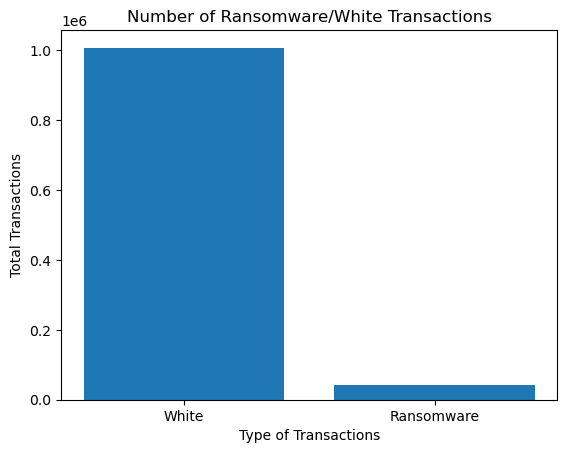

In [15]:
groupedlabel = df['labeltarget'].value_counts()
plt.bar(groupedlabel.index, groupedlabel.values)
plt.xlabel("Type of Transactions")
plt.ylabel("Total Transactions")
plt.title("Number of Ransomware/White Transactions")

In [16]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the categorical column and storing in the same column
df['labeltarget'] = label_encoder.fit_transform(df['labeltarget'])

# Checking the first five rows of the bitcoin heist data after labelencoding the labletarget column.
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label,labeltarget
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2011,11,18,0.008333,1,0,2,100050000.0,princetonCerber,0
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2011,132,44,0.000244,1,0,1,100000000.0,princetonLocky,0
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2011,246,0,1.000000,1,0,2,200000000.0,princetonCerber,0
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2011,322,72,0.003906,1,0,2,71200000.0,princetonCerber,0
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2011,238,144,0.072848,456,0,1,200000000.0,princetonLocky,0


In [17]:
# Checking the last five rows of the bitcoin heist data after labelencoding the labletarget column.
df.tail()

,address,year,day,length,weight,count,looped,neighbors,income,label,labeltarget
1048570,1LfcACYNGFQcmUKubH6G4M4BfqBTxxkgzs,2017,287,144,7.010000e-05,496,0,2,5.500000e+07,white,1
1048571,1KjB3Lg7SUPwrjbcLp6eSMgikJCqiA5sBM,2017,287,100,2.840000e-14,1,0,2,1.804997e+10,white,1
1048572,1BLFGmeZE8tFNJBAwsk6pRkgSHrM2RoA8E,2018,287,4,2.500000e-01,1,0,2,1.563393e+08,white,1
1048573,1JZ1SGn2DNtxUqUXYC8ENLheiEvC5QxBCP,2018,287,2,2.000000e-01,1,0,2,5.553651e+09,white,1
1048574,1B2nKRCcpk8BuZo3M8Ju3FU4Kv8vg6pRub,2018,287,26,5.000000e-01,1,0,1,5.855557e+07,white,1


# Feature Selection

<AxesSubplot:>

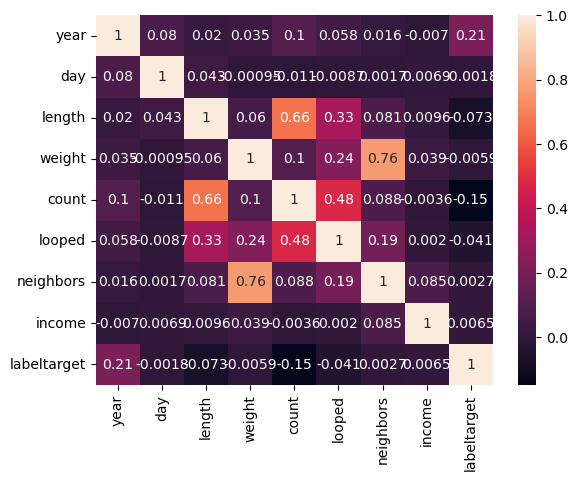

In [18]:
# Creating the heatmap of all the numrical data present in the bitcoin heist dataset.
sns.heatmap(df[["year", "day", "length", "weight", "count", "looped", "neighbors", "income", "labeltarget"]].corr(), annot=True)

In [19]:
# Creating a feature for the ML algorithm to classify the transaction as white or ransomware.
x = df[["year", "length", "weight", "looped", "neighbors", "income"]]

# Creating a target for the ML algorithm to classify the transaction as white or ransomware.
y = df[["labeltarget"]]

In [20]:
# Splitting the feature and target data into training and test set using stratified sampling with the ratio of 75:25 using the random state of 42.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [21]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (786431, 6)
y_train.shape (786431, 1)
X_test.shape (262144, 6)
y_test.shape (262144, 1)


# Model Building
### Gaussian Naive Bayes Classifier.

In [22]:
# Initializing the Gaussian Naive Bayes Classifier.
gnb_classifer = GaussianNB()

# Fitting the training and testing data into the Gaussian Naive Bayes classifier.
gnb_model = gnb_classifer.fit(X_train.values, y_train.values.ravel())

# Predicting the values of the features as 0(Ransomware) or 1(White) based on the training data.
y_pred = gnb_model.predict(X_test.values)

# Checking the number of mislabeled points out of the total test data points.
print(f"Number of mislabeled points out of the total { X_test.shape[0] } points : {(y_test.values.ravel() != y_pred).sum()}" )

# "year", "length", "weight", "looped", "neighbors", "income"
# Checking the prediction of a random data using the model built.
print(gnb_model.predict(np.array([[2013, 82, 0.125000954, 0, 1, 230000000]])))

Number of mislabeled points out of the total 262144 points : 10353
[1]


In [23]:
# Defining the function to calculate the metrics based on the actual and predicted data.
def calculatemetrics(actual_data, predicted_data):
    """This function calculates the metrics for the actual and predicted data obtained.

    Args:
        actual_data (list): actual data 
        predicted_data (list): predicted data
    """
    # Calculating the metrics for the given data.
    accuracy = accuracy_score(actual_data, predicted_data)
    precision = precision_score(actual_data, predicted_data, pos_label=1)
    recall = recall_score(actual_data, predicted_data, pos_label=1)
    f1 = f1_score(actual_data, predicted_data, pos_label=1)
    conf_matrix = confusion_matrix(actual_data, predicted_data)
    
    # Generate a detailed classification report.
    class_report = classification_report(y_test, y_pred)

    # Printing the metrics for the given data.
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Classification Report:\n", class_report)
    
    # Creating the heatmap for the confusion matrix data.
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.show()

### Gaussian Naive Bayes Model Results.

The training accuracy metrics of the Gaussian Naive Bayes model are: 


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.960505117422889
Precision: 0.960505117422889
Recall: 1.0
F1-Score: 0.9798547413999982
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10353
           1       0.96      1.00      0.98    251791

    accuracy                           0.96    262144
   macro avg       0.48      0.50      0.49    262144
weighted avg       0.92      0.96      0.94    262144



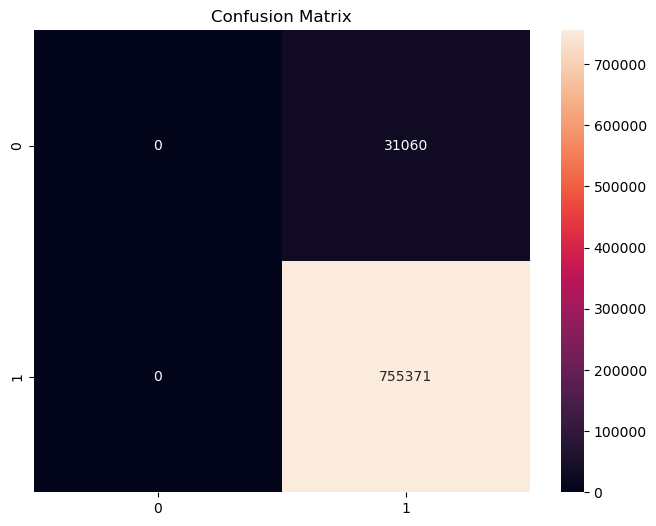

In [24]:
print("The training accuracy metrics of the Gaussian Naive Bayes model are: ")

# Predicting the values of the features as 0(Ransomware) or 1(White) of the training data.
y_train_pred = gnb_model.predict(X_train.values)
calculatemetrics(y_train, y_train_pred)

The testing accuracy metrics of the Gaussian Naive Bayes model are: 


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9605064392089844
Precision: 0.9605064392089844
Recall: 1.0
F1-Score: 0.9798554291885161
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10353
           1       0.96      1.00      0.98    251791

    accuracy                           0.96    262144
   macro avg       0.48      0.50      0.49    262144
weighted avg       0.92      0.96      0.94    262144



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


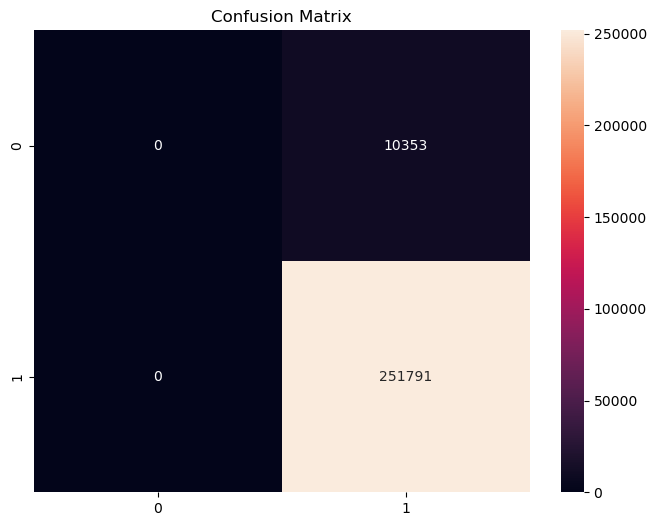

In [25]:
print("The testing accuracy metrics of the Gaussian Naive Bayes model are: ")
calculatemetrics(y_test, y_pred)

### DecisionTree Classifier

In [26]:
# Initializing the DecisionTree Classifier.
decision_tree_classifier = tree.DecisionTreeClassifier()

# Fitting the training and testing data into the DecisionTree Classifier.
decision_tree_model = decision_tree_classifier.fit(X_train.values, y_train.values.ravel())

# Predicting the values of the features as 0(Ransomware) or 1(White) based on the training data.
y_pred = decision_tree_model.predict(X_test.values)

# Checking the number of mislabeled points out of the total test data points.
print(f"Number of mislabeled points out of a total { X_test.shape[0] } points : {(y_test.values.ravel() != y_pred).sum()}" )

# "year", "length", "weight", "looped", "neighbors", "income"
# Checking the prediction of a random data using the model built.
print(decision_tree_model.predict(np.array([[2013, 82, 0.125000954, 0, 1, 230000000]])))

Number of mislabeled points out of a total 262144 points : 8656
[1]


### Decission Tree Classifier Model Results.

The training accuracy metrics of the Decission Tree Calssifier model are: 
Accuracy: 0.9925943916249487
Precision: 0.9944208811287525
Recall: 0.9978884548122711
F1-Score: 0.9961516503499461
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.54      0.56     10353
           1       0.98      0.98      0.98    251791

    accuracy                           0.97    262144
   macro avg       0.79      0.76      0.77    262144
weighted avg       0.97      0.97      0.97    262144



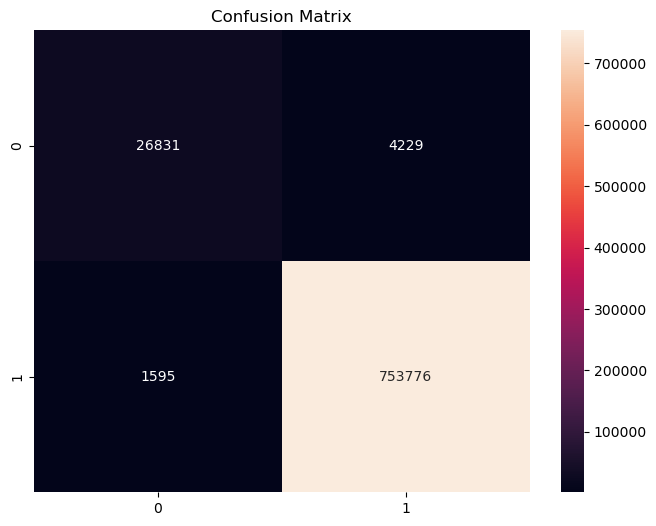

In [27]:
print("The training accuracy metrics of the Decission Tree Calssifier model are: ")

# Predicting the values of the features as 0(Ransomware) or 1(White) of the training data.
y_train_pred = decision_tree_model.predict(X_train.values)
calculatemetrics(y_train, y_train_pred)

The testing accuracy metrics of the Decission Tree Calssifier model are: 
Accuracy: 0.96697998046875
Precision: 0.9811943618709849
Recall: 0.9844911057186317
F1-Score: 0.9828399692324773
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.54      0.56     10353
           1       0.98      0.98      0.98    251791

    accuracy                           0.97    262144
   macro avg       0.79      0.76      0.77    262144
weighted avg       0.97      0.97      0.97    262144



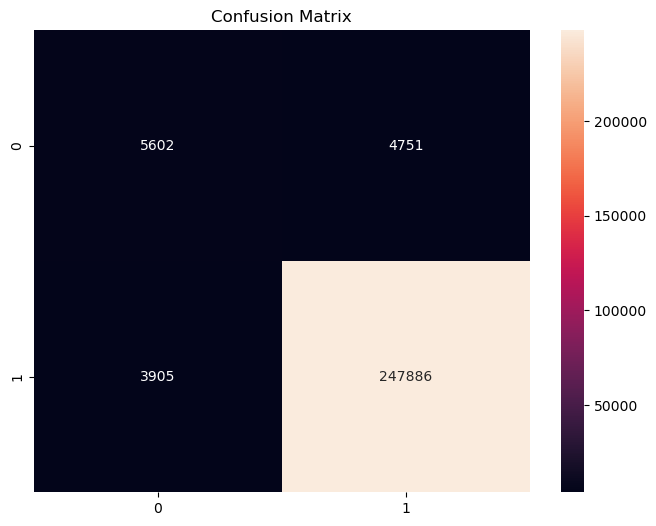

In [28]:
print("The testing accuracy metrics of the Decission Tree Calssifier model are: ")
calculatemetrics(y_test, y_pred)